## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

/bin/sh: 1: nvidia-smi: not found


In [5]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [6]:
train, test = keras.datasets.cifar10.load_data()

## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
#請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
def preproc_x(x, flatten=True):
    a = x.min()
    b = x.max()
    x = (x - a)/(b - a) 
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

Work

    請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
    請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
    (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度



In [9]:
"""Code Here
建立你的神經網路
"""
#請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,64,32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()


W0716 09:05:26.955127 140280821536576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 09:05:26.989174 140280821536576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 09:05:26.993367 140280821536576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [10]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [11]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0716 09:05:29.279902 140280821536576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 09:05:29.288313 140280821536576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0716 09:05:30.611162 140280821536576 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 09:05:30.662597 140280821536576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s 258us/step - loss: 2.0107 - acc: 0.2587 - val_loss: 1.8576 - val_acc: 0.3324
Epoch 2/100
50000/50000 [==============================] - 12s 246us/step - loss: 1.7812 - acc: 0.3574 - val_loss: 1.8028 - val_acc: 0.3483
Epoch 3/100
50000/50000 [==============================] - 12s 238us/step - loss: 1.6715 - acc: 0.3991 - val_loss: 1.6380 - val_acc: 0.4143
Epoch 4/100
50000/50000 [==============================] - 12s 237us/step - loss: 1.5832 - acc: 0.4337 - val_loss: 1.5601 - val_acc: 0.4438
Epoch 5/100
50000/50000 [==============================] - 12s 246us/step - loss: 1.5386 - acc: 0.4481 - val_loss: 1.5498 - val_acc: 0.4432
Epoch 6/100
50000/50000 [==============================] - 12s 241us/step - loss: 1.4970 - acc: 0.4640 - val_loss: 1.4865 - val_acc: 0.4701
Epoch 7/100
50000/50000 [==============================] - 13s 253us/step - loss: 1.4617 - acc: 0.4759 - val_l

Epoch 59/100
50000/50000 [==============================] - 6s 128us/step - loss: 0.5941 - acc: 0.7852 - val_loss: 1.9528 - val_acc: 0.5137
Epoch 60/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.5692 - acc: 0.7935 - val_loss: 1.9750 - val_acc: 0.5107
Epoch 61/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.5808 - acc: 0.7908 - val_loss: 1.9041 - val_acc: 0.5181
Epoch 62/100
50000/50000 [==============================] - 6s 130us/step - loss: 0.5586 - acc: 0.7971 - val_loss: 1.9677 - val_acc: 0.5164
Epoch 63/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.5488 - acc: 0.8008 - val_loss: 2.0670 - val_acc: 0.5164
Epoch 64/100
50000/50000 [==============================] - 7s 131us/step - loss: 0.5293 - acc: 0.8084 - val_loss: 2.1347 - val_acc: 0.5107
Epoch 65/100
50000/50000 [==============================] - 6s 127us/step - loss: 0.5379 - acc: 0.8068 - val_loss: 2.1156 - val_acc: 0.5131
Epoch 66/100
50000/5

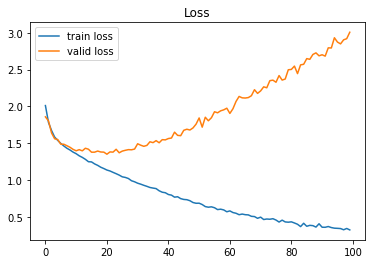

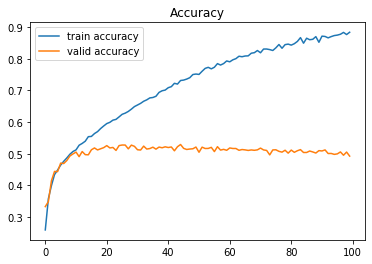

In [14]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()